# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data

In [2]:
spotify = pd.read_csv("spotify.csv")
spotify

,Title,Artist,Year,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,2004,Pop,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,2000,Rock,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,2001,Hip Hop,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,2007,Metal,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,2002,Rock,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,1958,Pop,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,1958,Pop,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,1959,Rock,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,1959,Jazz,174,26,45,-13,7,60,324,54,4,65


In [3]:
genre_features = spotify.groupby('Genre')[['Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Beats Per Minute (BPM)', 'Acousticness', 'Speechiness']].mean()
genre_features

,Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Beats Per Minute (BPM),Acousticness,Speechiness
Genre,,,,,,,,,
Blues,59.500000,64.875000,-10.875000,22.125000,66.625000,221.625000,113.000000,43.125000,7.125000
Country,51.150000,56.550000,-9.700000,26.150000,57.550000,199.650000,110.300000,52.850000,3.600000
Disco,70.888889,70.500000,-9.500000,24.055556,74.111111,283.166667,119.666667,14.388889,5.555556
Electronic,76.946429,57.696429,-7.392857,19.625000,37.714286,281.392857,126.053571,7.660714,5.196429
Folk,54.707692,47.784615,-10.061538,18.738462,38.984615,269.553846,121.553846,29.523077,3.938462
Funk,64.461538,62.000000,-9.307692,23.153846,50.230769,353.384615,123.000000,16.307692,6.153846
Hip Hop,65.722222,72.694444,-6.944444,27.083333,59.944444,257.111111,114.472222,20.805556,14.527778
Indie,65.533333,58.466667,-6.800000,12.400000,47.466667,276.533333,124.066667,31.733333,3.800000
Jazz,58.250000,59.750000,-9.750000,9.000000,52.500000,298.500000,138.250000,37.500000,6.000000


# Standardize the Data

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(genre_features)

# Apply KMeans Clustering

In [5]:
# Decide the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\diana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\diana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\diana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

In [6]:
inertia

[153.0,
 116.41737878121536,
 86.00476031571954,
 60.47999606786257,
 47.691651620026065,
 38.664941186091376,
 28.115496582405353,
 21.756359888205566,
 16.864852239436516,
 12.507005933207799]

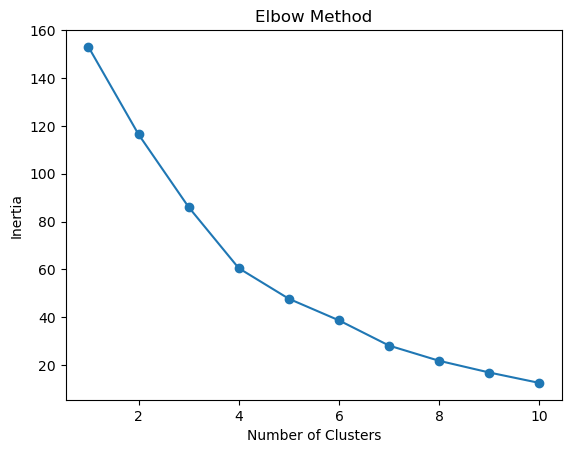

In [7]:
# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Select optimal k (e.g., from the elbow plot) and fit KMeans
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
genre_features['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\diana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# Step 4: Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 2.35921824,  0.61244108],
       [ 2.97493574, -1.22890481],
       [-0.04679759,  2.27924681],
       [-2.42731463,  0.36311296],
       [ 0.38486492, -1.75145016],
       [-1.12910396,  0.9955547 ],
       [ 0.04956969,  3.3719224 ],
       [-1.48272556, -0.72997482],
       [-0.58997527, -0.64379095],
       [-2.42001406,  0.00917323],
       [-2.88799791, -0.47138698],
       [ 0.86435779, -1.63573804],
       [ 0.89458902, -1.14269643],
       [ 2.1301039 ,  3.26372557],
       [-0.24634105, -0.47646045],
       [ 0.29421757, -1.00982048],
       [ 1.27841317, -1.80495363]])

In [10]:
# Create a DataFrame for visualization
visualization_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
visualization_df['Cluster'] = genre_features['Cluster'].values
visualization_df['Genre'] = genre_features.index

In [11]:
visualization_df

,PC1,PC2,Cluster,Genre
0,2.359218,0.612441,1,Blues
1,2.974936,-1.228905,2,Country
2,-0.046798,2.279247,1,Disco
3,-2.427315,0.363113,0,Electronic
4,0.384865,-1.751450,2,Folk
5,-1.129104,0.995555,0,Funk
6,0.049570,3.371922,1,Hip Hop
7,-1.482726,-0.729975,0,Indie
8,-0.589975,-0.643791,2,Jazz
9,-2.420014,0.009173,3,Latin


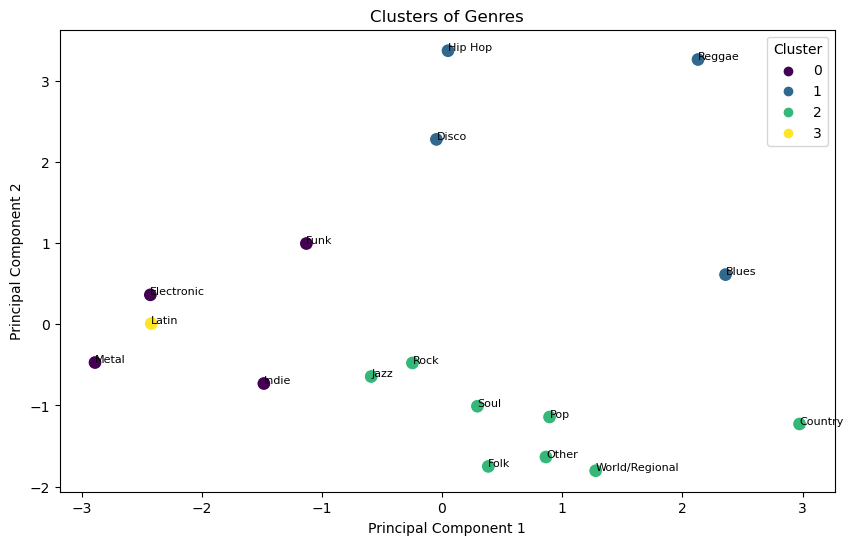

In [12]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=visualization_df, palette='viridis', s=100
)
for i, txt in enumerate(visualization_df['Genre']):
    plt.annotate(txt, (visualization_df['PC1'][i], visualization_df['PC2'][i]), fontsize=8)
plt.title('Clusters of Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Cluster Insights:

- Cluster 0: Likely represents genres that are more instrumental or experimental, given the inclusion of Electronic, Funk, Indie and Metal.
- Cluster 1: Might consist of upbeat or rhythmic genres such as Blues, Disco, Hip Hop, and Reggae.
- Cluster 2: Appears to include a mix of more mainstream or traditional genres like Country, Pop, and Jazz.
- Cluster 3: Focuses on regional or cultural music styles, as shown by the presence of Latin.

In [13]:
cluster_summary = visualization_df.groupby('Cluster').count()
cluster_summary

,PC1,PC2,Genre
Cluster,,,
0,4,4,4
1,4,4,4
2,8,8,8
3,1,1,1


# Label Descriptions:

In [14]:
cluster_labels = {
    0: 'Instrumental/Experimental',
    1: 'Rhythmic/Upbeat',
    2: 'Mainstream/Traditional',
    3: 'Cultural/Regional'
}
visualization_df['Cluster Label'] = visualization_df['Cluster'].map(cluster_labels)
visualization_df

,PC1,PC2,Cluster,Genre,Cluster Label
0,2.359218,0.612441,1,Blues,Rhythmic/Upbeat
1,2.974936,-1.228905,2,Country,Mainstream/Traditional
2,-0.046798,2.279247,1,Disco,Rhythmic/Upbeat
3,-2.427315,0.363113,0,Electronic,Instrumental/Experimental
4,0.384865,-1.751450,2,Folk,Mainstream/Traditional
5,-1.129104,0.995555,0,Funk,Instrumental/Experimental
6,0.049570,3.371922,1,Hip Hop,Rhythmic/Upbeat
7,-1.482726,-0.729975,0,Indie,Instrumental/Experimental
8,-0.589975,-0.643791,2,Jazz,Mainstream/Traditional
9,-2.420014,0.009173,3,Latin,Cultural/Regional


# Dynamic Recommendations:

In [15]:
def recommend_genres(genre, df):
    cluster = df[df['Genre'] == genre]['Cluster'].values[0]
    similar_genres = df[df['Cluster'] == cluster]['Genre'].tolist()
    similar_genres.remove(genre)
    return similar_genres

recommend_genres('Pop', visualization_df)


['Country', 'Folk', 'Jazz', 'Other', 'Rock', 'Soul', 'World/Regional']

In [16]:
recommend_genres('Blues', visualization_df)

['Disco', 'Hip Hop', 'Reggae']

In [17]:
recommend_genres('Indie', visualization_df)

['Electronic', 'Funk', 'Metal']